In [1]:
import apyori

In [44]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
#df = pd.read_csv('./events.csv', sep=',')
import os
import sys
print(os.listdir('./'))
print(os.listdir('../../data'))

['.Trash-0', '.ipynb_checkpoints', 'Untitled.ipynb', 'InstARL.ipynb']
['apyori_inst_spb003092.csv', 'instagram_posts', 'apyori_inst_spb00035.csv', 'apyori_inst_spbf.csv', 'apyori_inst_spb00031.csv', 'apyori_inst_spb0004.csv', 'apyori_inst_spb003095.csv', 'spb_posts_2019.csv', 'kudago_data', 'apyori_inst_spb003091.csv', 'apyori_inst_spb0005.csv', 'apyory']


# FOR SPB 2019

In [4]:
df0 = pd.read_csv('../../data/spb_posts_2019.csv', sep=',')

In [5]:
spb_supports = dict()

In [6]:
df = df0

In [7]:
def change_endline(x):
    return x.replace('\n',' ')

def extract_hashtags(x):
    x = x.replace('#', ' #')
    tags = re.findall(r'(#\S+?)\s', x)
    #tags = set(re.findall(r'(#\S+?)\s', x)) #exclude the same tags
    #normalize hashtags
    return tags if len(tags) else np.nan

def prepare_db(df):
    df = df.dropna()
    df['caption'] = df['caption'].apply(change_endline)
    df['hashtags'] = df['caption'].apply(extract_hashtags)
    df = df.dropna()
    return df

In [8]:
# we have only posts with hashtags
df = prepare_db(df)
df

<ipython-input-7-417349c8d962>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['caption'] = df['caption'].apply(change_endline)
<ipython-input-7-417349c8d962>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hashtags'] = df['caption'].apply(extract_hashtags)


,id,shortcode,imageurl,isvideo,caption,commentscount,timestamp,likescount,isad,authorid,locationid,lat,lon,hashtags
0,2100487392867125154,B0mbierCAei,https://scontent-dfw5-1.cdninstagram.com/v/t51...,f,DEATH 💀GUITARIST 🎸DANCING 💃 UNIQUE CONTENT 🔥 М...,3,1564617631,50,f,2895837725,409734806,60.002420,30.296490,"[#мертвый, #гитарист, #гитара, #прыгун, #death..."
3,2101062776215474217,B0oeXaLHpAp,https://scontent-dfw5-2.cdninstagram.com/v/t51...,f,Мои девочки 💛❤️💜 Такие редкие и долгожданные в...,3,1564686222,74,f,654993988,1020316384,59.957330,30.297810,[#13летвместе]
5,2100490830881135651,B0mcUgkopwj,https://scontent-dfw5-1.cdninstagram.com/v/t51...,f,Мы с Петром проверяем кто во сколько просыпает...,4,1564618041,144,f,208777983,1991970784229637,59.950163,30.315356,[#ставьлайк]
7,2100301459588903831,B0lxQy0B_OX,https://scontent-sea1-1.cdninstagram.com/v/t51...,t,MarkHockey - территория вратарей! 👍🏻 По вопрос...,5,1564634856,188,f,1099063802,411430829,59.921501,30.467902,"[#markhockey, #mh, #markwear, #hockey, #khl, #..."
8,2100489264618828711,B0mb9t4IHOn,https://scontent-dfw5-2.cdninstagram.com/v/t51...,f,#детали #единорог #единорогпиньята #единорожка...,0,1564617854,7,f,180487090,594287207,59.877330,30.318980,"[#детали, #единорог, #единорогпиньята, #единор..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7759923,2031253672851326072,BwwdnQTAsR4,https://scontent-dfw5-2.cdninstagram.com/v/t51...,f,"💛Питер... как это не странно, но я уже скучаю....",5,1556364328,127,f,641568821,226091755,59.971781,30.259442,"[#санктпетербург, #скучаюспб, #питер, #крестов..."
7759926,2031206110870801771,BwwSzIwDo1r,https://scontent-dfw5-2.cdninstagram.com/v/t51...,f,Коротко и ёмко об идеальной субботе. #СанктПет...,2,1556358659,43,f,306906698,226091755,59.971781,30.259442,"[#СанктПетербург, #крестовский, #выходные, #су..."
7759927,2031151080009010240,BwwGSVRFoxA,https://scontent-dfw5-2.cdninstagram.com/v/t51...,f,СЦЕНАРИИ МОЕЙ МЕЧТЫ ⭐️ ⭐️ Сегодня на своём онл...,93,1556352098,1758,f,1930430096,226091755,59.971781,30.259442,"[#коучспб, #психологонлайн, #софиявеларди, #за..."
7759928,2031118233699991176,Bwv-0Wwgb6I,https://scontent-dfw5-1.cdninstagram.com/v/t51...,f,"Доброе субботнее утро 🌞 ,Красотки 👑 ⠀ В прошлы...",91,1556348183,2215,f,5885545914,226091755,59.971781,30.259442,"[#dragonmask_enjoli, #enjoli, #маскадлялица, #..."


In [9]:
transactions = df['hashtags'].tolist()
post_count = df.shape[0]

In [10]:
def do_apriori(transactions, support, confidence = 0.75, lift = 1.2):
    result = list(apyori.apriori(transactions, min_support=support, min_confidence=confidence, min_lift=lift, min_length = 2))
    temp = []
    for i in range(len(result)):
      temp.append([list(result[i][0]), result[i][1], result[i][2][0][2], result[i][2][0][3]])
    result_df = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
    tags_set = set(result_df['items'].sum())
    return result_df, tags_set

In [11]:
%%time
#0.003092 - original (5 mins)
result_df, tags = do_apriori(transactions, 0.003092)

CPU times: user 5min 24s, sys: 3.66 s, total: 5min 27s
Wall time: 5min 28s


In [12]:
def delete_tags(df, tags, original_post_count):
    def _delete_tags(x):
        # set of post hastags - set of adv hastags
        new_x = set(x) - tags
        return new_x if len(new_x) else np.nan
    df['hashtags'] = df['hashtags'].apply(_delete_tags)
    prev_shape = df.shape[0]
    df = df.dropna()
    new_shape = df.shape[0]
    print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/original_post_count)
    return df

In [13]:
df = delete_tags(df, tags, post_count)

37915  posts were deleted, percentage: 0.010925577839591251


Now min_support is less than before, so we can find more sensitive rules

In [14]:
transactions = df['hashtags'].tolist()

In [15]:
%%time
#0.0028 - 1 min
#0.002783 - 1 min
#0.0027825 - 1.5 min
#0.0027823 - 4 mins
result_df2, tags2 = do_apriori(transactions, 0.0027823)

CPU times: user 4min 21s, sys: 3.66 s, total: 4min 25s
Wall time: 4min 26s


In [16]:
df = delete_tags(df, tags2, post_count)

<ipython-input-12-cd39839da4f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hashtags'] = df['hashtags'].apply(_delete_tags)


499  posts were deleted, percentage: 0.0001437917273363058


Постов, которые содержали только эти хэштеги мало. Возможно, имеет смысл удалять любые, которые содержат хотя бы n штук из перечня, чтоб была возможность контролировать чувствительность.

In [17]:
transactions = df['hashtags'].tolist()

In [18]:
%%time
#0.0027823 - 1 min
#0.0026 - 1.5 - new 120 entries
result_df3, tags3 = do_apriori(transactions, 0.0025)

CPU times: user 1min 2s, sys: 2.86 s, total: 1min 5s
Wall time: 1min 5s


In [19]:
df = delete_tags(df, tags3, post_count)

8773  posts were deleted, percentage: 0.0025280256992413043


In [20]:
transactions = df['hashtags'].tolist()

In [21]:
%%time
#0.001 - 2 min
result_df4, tags4 = do_apriori(transactions, 0.001)

CPU times: user 2min 46s, sys: 3.51 s, total: 2min 49s
Wall time: 2min 50s


In [22]:
df = delete_tags(df, tags4, post_count)

3859  posts were deleted, percentage: 0.0011120085687190463


In [23]:
transactions = df['hashtags'].tolist()

In [24]:
%%time
#0.001 - 2 min
result_df5, tags5 = do_apriori(transactions, 0.0009)

CPU times: user 2min 2s, sys: 4.29 s, total: 2min 7s
Wall time: 2min 7s


In [25]:
df = delete_tags(df, tags5, post_count)

784  posts were deleted, percentage: 0.0002259172629893061


In [26]:
transactions = df['hashtags'].tolist()

In [27]:
%%time
#0.001 - 2 min
result_df6, tags6 = do_apriori(transactions, 0.0008)

CPU times: user 3min 4s, sys: 3.88 s, total: 3min 8s
Wall time: 3min 9s


In [28]:
df = delete_tags(df, tags6, post_count)

462  posts were deleted, percentage: 0.0001331298156901268


In [29]:
transactions = df['hashtags'].tolist()

In [30]:
%%time
#0.001 - 2 min
result_df7, tags7 = do_apriori(transactions, 0.0006)

CPU times: user 10min 33s, sys: 8.19 s, total: 10min 41s
Wall time: 10min 43s


In [31]:
df = delete_tags(df, tags7, post_count)

2300  posts were deleted, percentage: 0.0006627674807084236


Plots creating

In [42]:
spb_rules_df =  pd.concat([result_df, result_df2, result_df3, result_df4, result_df5, result_df6, result_df7])

In [43]:
spb_rules_df.sort_values(by=['support'])

,items,support,confidence,lift
166,"[#likes, #l4l, #likesforlikes]",0.000600,0.813889,807.745729
159,"[#likebackteam, #liker, #l4l]",0.000600,0.778959,1086.286003
96,"[#drawing, #artist, #art]",0.000600,0.900790,60.647769
533,"[#likebackteam, #likes4likes, #l4l, #likesforl...",0.000601,0.779719,1243.042573
1,"[#artlife, #artwork]",0.000601,0.810576,351.370118
...,...,...,...,...
940,"[#питер, #спб, #spb, #санктпетербург]",0.006975,0.773298,7.826408
150,"[#педикюрспб, #маникюрспб]",0.007052,0.800484,24.008828
143,"[#педикюр, #маникюр]",0.008437,0.840452,31.486770
214,"[#спб, #saintpetersburg, #санктпетербург]",0.009352,0.755570,9.583315


In [ ]:
# support cuts: 0.003092, 0.0027823, 0.0025, 0.001, 0.0009, 0.0008, 0.0006

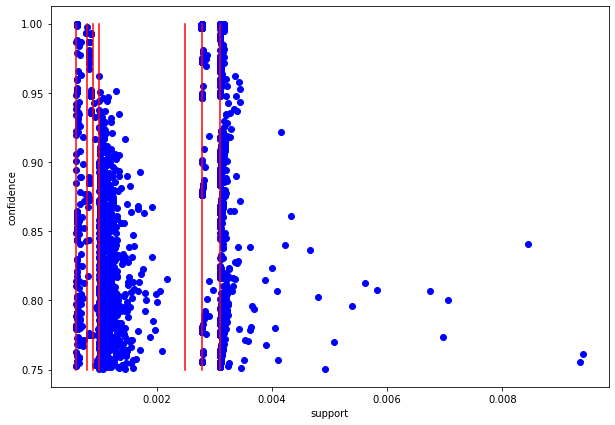

In [67]:
plt.figure(figsize=(10, 7))
ax = plt.axes()
ax.scatter(spb_rules_df['support'], spb_rules_df['confidence'], c='blue')

for sup in [0.003092, 0.0027823, 0.0025, 0.001, 0.0009, 0.0008, 0.0006]:
    ax.plot([sup, sup], [0.75, 1], c='red')

    ax.set_xlabel('support')
ax.set_ylabel('confidence')
plt.show()

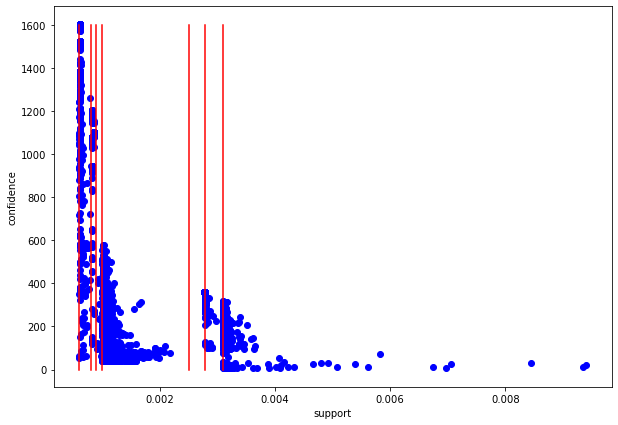

In [69]:
plt.figure(figsize=(10, 7))
ax = plt.axes()
ax.scatter(spb_rules_df['support'], spb_rules_df['lift'], c='blue')

for sup in [0.003092, 0.0027823, 0.0025, 0.001, 0.0009, 0.0008, 0.0006]:
    ax.plot([sup, sup], [0, 1600], c='red')

    ax.set_xlabel('support')
ax.set_ylabel('confidence')
plt.show()

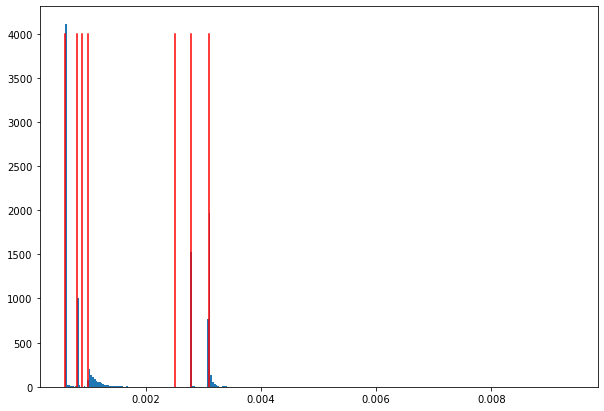

In [77]:
plt.figure(figsize=(10, 7))
ax = plt.axes()
for sup in [0.003092, 0.0027823, 0.0025, 0.001, 0.0009, 0.0008, 0.0006]:
    ax.plot([sup, sup], [0, 4000], c='red')
ax.hist(spb_rules_df['support'], bins = 300)
plt.show()

# LONDON 2019

In [ ]:
df_london = pd.read_csv('../../data/instagram_posts/london_posts_2019.csv', sep=',')
df = df_london
df

In [ ]:
df = df.dropna()
df['caption'] = df['caption'].apply(change_endline)
df['hashtags'] = df['caption'].apply(extract_hashtags)
df = df.dropna()

In [ ]:
transactions = df['hashtags'].tolist()
post_count = df.shape[0]
transactions[1:4]

layer 1

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.004, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_london = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_london.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_london['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 2

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.002, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_london = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_london.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_london['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 3

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.001, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_london = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_london.sort_values(by=['support'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_london['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 4

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.0005, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_london = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_london.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_london['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

# MOSCOW 2019

In [ ]:
df_moscow = pd.read_csv('../../data/instagram_posts/moscow_posts_2019.csv', sep=',')
df = df_moscow
df

In [ ]:
df = df.dropna()
df['caption'] = df['caption'].apply(change_endline)
df['hashtags'] = df['caption'].apply(extract_hashtags)
df = df.dropna()
transactions = df['hashtags'].tolist()
post_count = df.shape[0]
transactions[1:4]

layer 1

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.003, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 2

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.002, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 3

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.001, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 4

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.0009, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

# NYC 2019

In [ ]:
df_nyc = pd.read_csv('../../data/instagram_posts/nyc_posts_2019.csv', sep=',')
df = df_nyc
df

In [ ]:
df = df.dropna()
df['caption'] = df['caption'].apply(change_endline)
df['hashtags'] = df['caption'].apply(extract_hashtags)
df = df.dropna()
transactions = df['hashtags'].tolist()
post_count = df.shape[0]
transactions[1:4]

layer 1

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.004, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 2

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.002, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 3

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.001, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 4

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.0009, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)